# Computational Social Science Project #3

**Enter your Name:**Kritika Chopra
*Semester:* Fall 2024

## 1. Introduction

### Load data

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore.
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("Chicago Inspections 2011-2013.csv",
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)


In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# list column names
print(chicago_inspections_2011_to_2013.columns)

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name',
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2014.drop(columns = ['AKA_Name',
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE'],
                                     inplace = True)

# set index
chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [7]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])

In [8]:
chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014['Inspection_Date'])

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

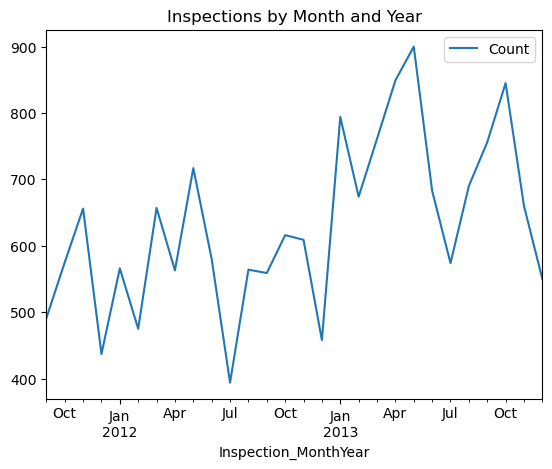

In [9]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year")

Let's visualize what the distribution of results looks like.

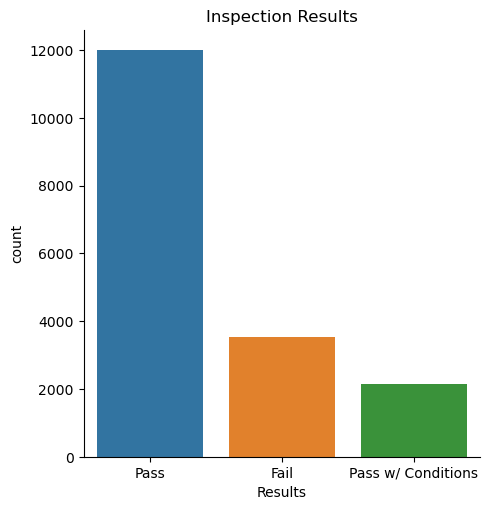

In [10]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

Inspection was the highest in April and then in October. Around 12000 inspections was passed and around 4000 incpections were failed.

What if we separate results by facility type?

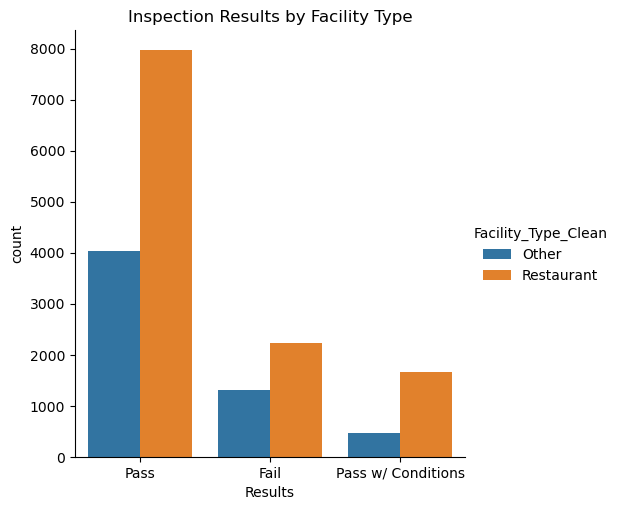

In [11]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

More number of restaurants passed than other category. Less number of other category failed than restaurants. There were more restaurants those were passed with conditions.

## 2. Data Preprocessing and Cleaning

In [12]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [13]:
# drop datetime info
# -----------
chicago_inspections_2014 = chicago_inspections_2014.dropna().drop(['Inspection_Date','minDate',
                                                                                   'maxDate'],
                                                                                  axis = 1)

In [14]:
# process target
# -----------
y = chicago_inspections_2011_to_2013['Results']

# decide if you want to binarize the outcome variable
# yes I would binaritze the outcome
# comment out the following lines of code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

y = y.reshape(-1)
# process features
# -----------
# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results',
                                                     'Facility_Type',
                                                     'LICENSE_DESCRIPTION',
                                                     'WARD_PRECINCT'])


# get dummies
X = pd.get_dummies(X)


In [15]:
correlation = X.corr()

In [16]:
# Compute the correlation matrix
correlation = X.corr()

# Find features with correlation > 0.9
threshold = 0.9
groups = []

for i in range(len(correlation.columns)):
    for j in range(i + 1, len(correlation.columns)):
        if abs(correlation.iloc[i, j]) > threshold:
            group = {correlation.columns[i], correlation.columns[j]}
            # Merge overlapping groups
            merged = False
            for g in groups:
                if group & g:
                    g.update(group)
                    merged = True
                    break
            if not merged:
                groups.append(group)

# Print features in groups
for group in groups:
    print(group)


{'firstRecord', 'timeSinceLast'}
{'Facility_Type_Clean_Other', 'Facility_Type_Clean_Restaurant'}
{'APPLICATION_TYPE_ISSUE', 'APPLICATION_TYPE_RENEW'}


In [18]:
y_new= chicago_inspections_2014['Results']

# decide if you want to binarize the outcome variable
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y_new= y_new.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_new = lb_style.fit_transform(y_new)

# recode 0s and 1s so 1s are "Fail"
y_new= np.where(y_new == 1, 0 ,1)

y_new = y_new.reshape(-1)
# process features
# -----------

# create feature dataset
X_new = chicago_inspections_2014.drop(columns = ['Results',
                                                     'Facility_Type',
                                                     'LICENSE_DESCRIPTION',
                                                     'WARD_PRECINCT'])


# get dummies
X_new = pd.get_dummies(X_new)

In [19]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


In [20]:
# Select only the columns with boolean data type
boolean_columns = X.select_dtypes(include=['bool']).columns

# Convert only the boolean columns to 1 and 0
X[boolean_columns] = X[boolean_columns].astype(int)

# Display the updated DataFrame
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,0,0,1,1,1,0,0,0,0,1
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,1,0,0,1,0,1,0,0,0,1
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,1,0,0,1,0,1,0,0,0,1
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,1,0,0,1,0,1,0,0,0,1
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,0,1,0,1,0,1,0,0,0,1


In [21]:
# Select only the columns with boolean data type
boolean_columns = X_new.select_dtypes(include=['bool']).columns

# Convert only the boolean columns to 1 and 0
X_new[boolean_columns] = X_new[boolean_columns].astype(int)

# Display the updated DataFrame
X_new.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
920445,SUBWAY,2,0,0,0,0,0,0,0.794521,0,4.0,1.432877,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,12.034833,7.194320,1.219222,1,1,0,0,1,0,1,0,0,1,0
920446,SHARKS FISH & CHICKEN,0,0,6,0,0,0,2,0.660274,0,4.0,9.931507,0,0,0,0,0,0,0,0,0,0,0,0,0.002300,28.16,6.020000,0.746667,26.292725,27.837325,12.401466,0,0,1,0,1,0,1,0,0,0,1
920448,P K PETRO INC.,0,1,7,0,0,0,0,2.000000,1,3.0,11.013699,0,1,0,0,0,0,0,0,0,1,0,0,0.000433,25.30,7.653333,0.636667,49.468944,11.282325,66.467028,0,0,0,1,1,1,0,0,0,0,1
920449,"Z T DOLLAR EXCHANGE,INC",1,2,5,0,0,0,0,2.000000,1,3.0,1.408219,0,1,0,0,0,1,0,0,0,0,0,0,0.000433,25.30,7.653333,0.636667,69.939833,26.695701,76.827119,1,0,0,1,1,1,0,0,0,1,0
920450,KENNEDY FISH & CHICKEN,0,1,7,0,0,0,3,0.964384,0,3.0,3.304110,0,0,0,0,0,0,0,0,0,0,0,0,0.000433,25.30,7.653333,0.636667,69.662066,27.638311,78.175677,0,1,0,0,1,0,1,0,0,0,1


## 3. Fit Models

Now choose 3 different machine learning techniques and apply them below. Choose from one of the algorithms we have used in lab (e.g., logistic regression, random forests, `AdaBoost()`, `xgboost()`, `VotingClassifer()`, or `BART`).

Detail the basic logic and assumptions underlying each model, its pros/cons, and why it is a plausible choice for this problem. Also, be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using either train/validation splits or cross-validation)

### Model 1

In [22]:
# AdaBoost()
#!pip install -U scikit-learn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report

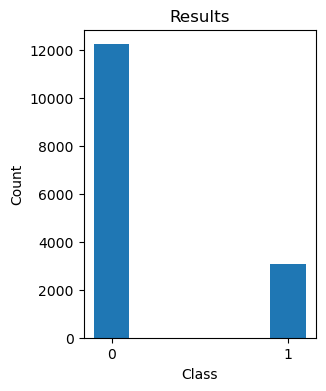

In [23]:
# Count occurrences of 0 and 1
unique, counts = np.unique(y, return_counts=True)

# Create the bar plot
plt.figure(figsize=(3, 4))
plt.bar(unique, counts, tick_label=["0", "1"], width = 0.2)
plt.title("Results")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

#### Startified Cross-validation
Since 0s and 1s are not 50-50 I am using stratified cross validation

In [28]:
# Initialize AdaBoost model with a Decision Tree as the estimator
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(),
    random_state=42
)

# Define the parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],  # Number of weak learners
    "learning_rate": [0.01, 0.1, 1.0],  # Shrinkage factor
    "estimator__max_depth": [1, 3, 5, 7, 10]  # Depth of the decision tree base estimator
}

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(
    estimator=ada,
    param_grid=param_grid,
    scoring="accuracy",  # Adjust scoring as needed, e.g., f1-score for imbalanced data
    cv=skf,  # Use StratifiedKFold for cross-validation
    n_jobs=-1,  # Use all processors
    verbose=3  # Display progress
)

# Fit GridSearchCV on the data
grid_search.fit(X, y)

# Display the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Retrieve the best model
best_model_adaboost = grid_search.best_estimator_

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Parameters: {'estimator__max_depth': 5, 'learning_rate': 0.01, 'n_estimators': 200}
Best Accuracy: 0.9280905683456044


###  Model 2

In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [34]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV with XGBoost
xgb = XGBClassifier(eval_metric='logloss', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=skf,
    n_jobs=-1
)

# Fit GridSearchCV on the training data
grid_search.fit(X, y)

# Retrieve the best model and parameters
best_model_xgb = grid_search.best_estimator_


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50, 'subsample': 1.0}
Best Cross-Validation Score: 0.93116041465817


### Model 3

In [35]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [36]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 7, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'bootstrap': [True, False]
}

In [37]:
# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X, y)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total t

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 7, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [38]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9261968933263646


In [39]:
best_rf = grid_search.best_estimator_

### Validation Metrics

Be sure to explain which of these metrics you would want to prioritize when conducting predictive auditing in this context and why.

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

In [40]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score


In [41]:
# model = RandomForestClassifier()
scorers = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

In [42]:
results = {}
for metric, scorer in scorers.items():
    scores = cross_val_score(best_rf, X, y, cv=5, scoring=scorer)
    results[metric] = scores
    print(f"{metric.capitalize()} Scores: {scores}")
    print(f"Mean {metric.capitalize()}: {scores.mean():.4f}")

Accuracy Scores: [0.92556317 0.92129327 0.91737427 0.9350098  0.93174396]
Mean Accuracy: 0.9262
Precision Scores: [0.7972561  0.75474255 0.74396783 0.78396739 0.7950938 ]
Mean Precision: 0.7750
Recall Scores: [0.84627832 0.90275527 0.89951378 0.93517018 0.89158576]
Mean Recall: 0.8951
F1 Scores: [0.82103611 0.82214022 0.81438004 0.85291944 0.84057971]
Mean F1: 0.8302


High acuracy shows that the model is performing well on majority of cases.
Precision score show that the model is not good at avoiding false positives.
Recall score shows that model is minimizing false negatives by finding actual positives.
F1 score shows that both recall and precision has good performance.

I will user recall scores as it minimizes false negatives by finding actual positives.

In [43]:
# model = AdaBoostClassifier()

# Define scorers
scorers = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

results = {}
for metric, scorer in scorers.items():
    scores = cross_val_score(best_model_adaboost, X, y, cv=5, scoring=scorer)
    results[metric] = scores
    print(f"{metric.capitalize()} Scores: {scores}")
    print(f"Mean {metric.capitalize()}: {scores.mean():.4f}")

Accuracy Scores: [0.92393079 0.92096669 0.91998694 0.93305029 0.93272371]
Mean Accuracy: 0.9261
Precision Scores: [0.77304965 0.74382315 0.74093264 0.77034121 0.78142077]
Mean Precision: 0.7619
Recall Scores: [0.88187702 0.92706645 0.92706645 0.95137763 0.92556634]
Mean Recall: 0.9226
F1 Scores: [0.82388511 0.82539683 0.82361411 0.85134155 0.84740741]
Mean F1: 0.8343


In [44]:
# Define XGBoost model
# model = XGBClassifier(eval_metric='logloss')  # Ensure you set eval_metric for XGBoost

# Define scorers
scorers = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary'),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}


results = {}
for metric, scorer in scorers.items():
    scores = cross_val_score(best_model_xgb, X, y, cv=5, scoring=scorer)
    results[metric] = scores
    print(f"{metric.capitalize()} Scores: {scores}")
    print(f"Mean {metric.capitalize()}: {scores.mean():.4f}")

Accuracy Scores: [0.92458374 0.92259961 0.91737427 0.92913129 0.92619203]
Mean Accuracy: 0.9240
Precision Scores: [0.79010495 0.76027397 0.74931507 0.77855153 0.79878049]
Mean Precision: 0.7754
Recall Scores: [0.85275081 0.89951378 0.88654781 0.90599676 0.84789644]
Mean Recall: 0.8785
F1 Scores: [0.82023346 0.82405345 0.8121752  0.83745318 0.82260597]
Mean F1: 0.8233


## 4. Policy Simulation

### Interpretable Machine Learning

Use tools like coefficient plots or feature importance plots to investigate your models. Which features contribute to your predictions? Are there any additional features you wish you could incorporate that you don't have available in this analysis?

**Hint**: Use tools like feature importance plots and coefficient plots.

In [45]:
features = X.columns.tolist()
print(features)

['criticalCount', 'seriousCount', 'minorCount', 'pastFail', 'pastCritical', 'pastSerious', 'pastMinor', 'timeSinceLast', 'firstRecord', 'POLICE_DISTRICT', 'ageAtInspection', 'consumption_on_premises_incidental_activity', 'tobacco', 'package_goods', 'outdoor_patio', 'public_place_of_amusement', 'limited_business_license', 'childrens_services_facility_license', 'tavern', 'regulated_business_license', 'filling_station', 'caterers_liquor_license', 'mobile_food_license', 'precipIntensity', 'temperatureMax', 'windSpeed', 'humidity', 'heat_burglary', 'heat_garbage', 'heat_sanitation', 'criticalFound', 'Risk_Risk 1 (High)', 'Risk_Risk 2 (Medium)', 'Risk_Risk 3 (Low)', 'Inspection_Type_Canvass', 'Facility_Type_Clean_Other', 'Facility_Type_Clean_Restaurant', 'APPLICATION_TYPE_C_EXPA', 'APPLICATION_TYPE_C_LOC', 'APPLICATION_TYPE_ISSUE', 'APPLICATION_TYPE_RENEW']


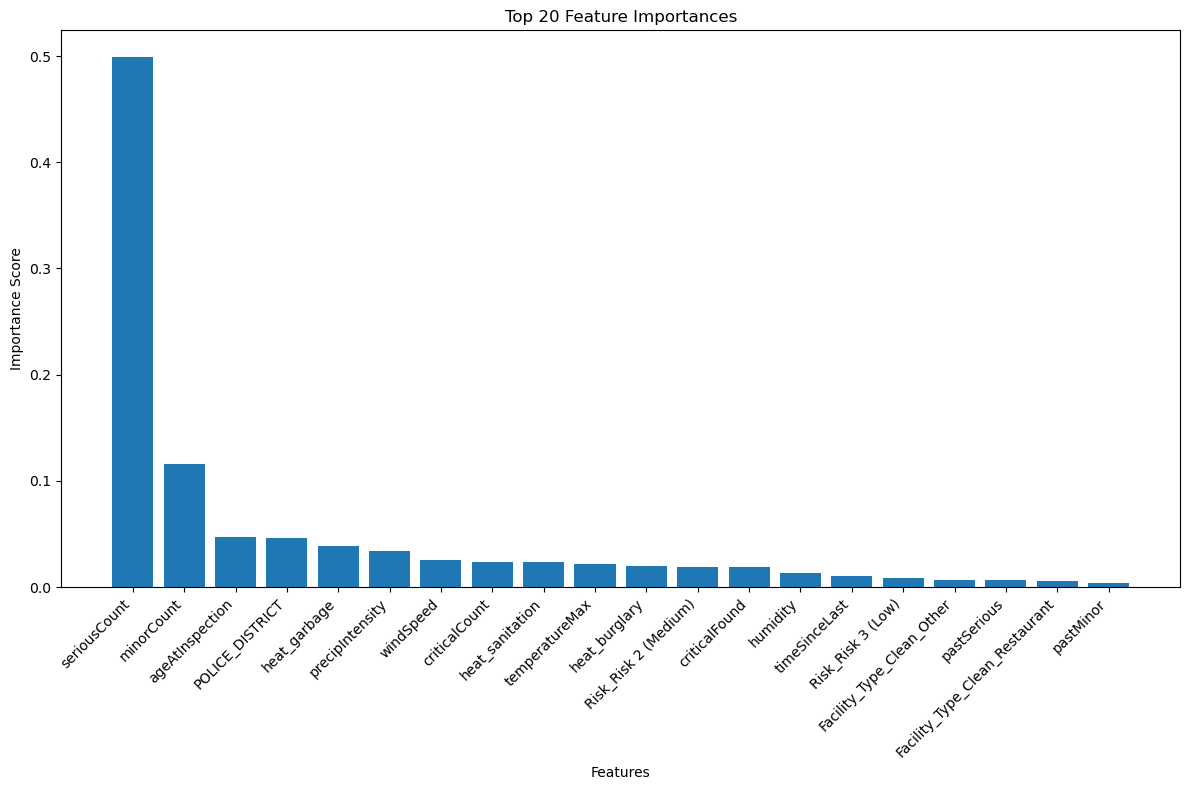

In [46]:
# AdaBoost model
feature_importances = best_model_adaboost.feature_importances_

# descending order
indices = np.argsort(feature_importances)[::-1]

# Limiting to top 20 features
top_n = 20
plt.figure(figsize=(12, 8))  # Create the plot figure

# Plot the top N features
plt.bar(range(top_n), feature_importances[indices[:top_n]], align="center")

# Add feature names to the x-axis
plt.xticks(range(top_n), [features[i] for i in indices[:top_n]], rotation=45, ha="right")

# Add labels and title
plt.title(f"Top {top_n} Feature Importances")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()  # Adjust layout
plt.show()  # Display the plot

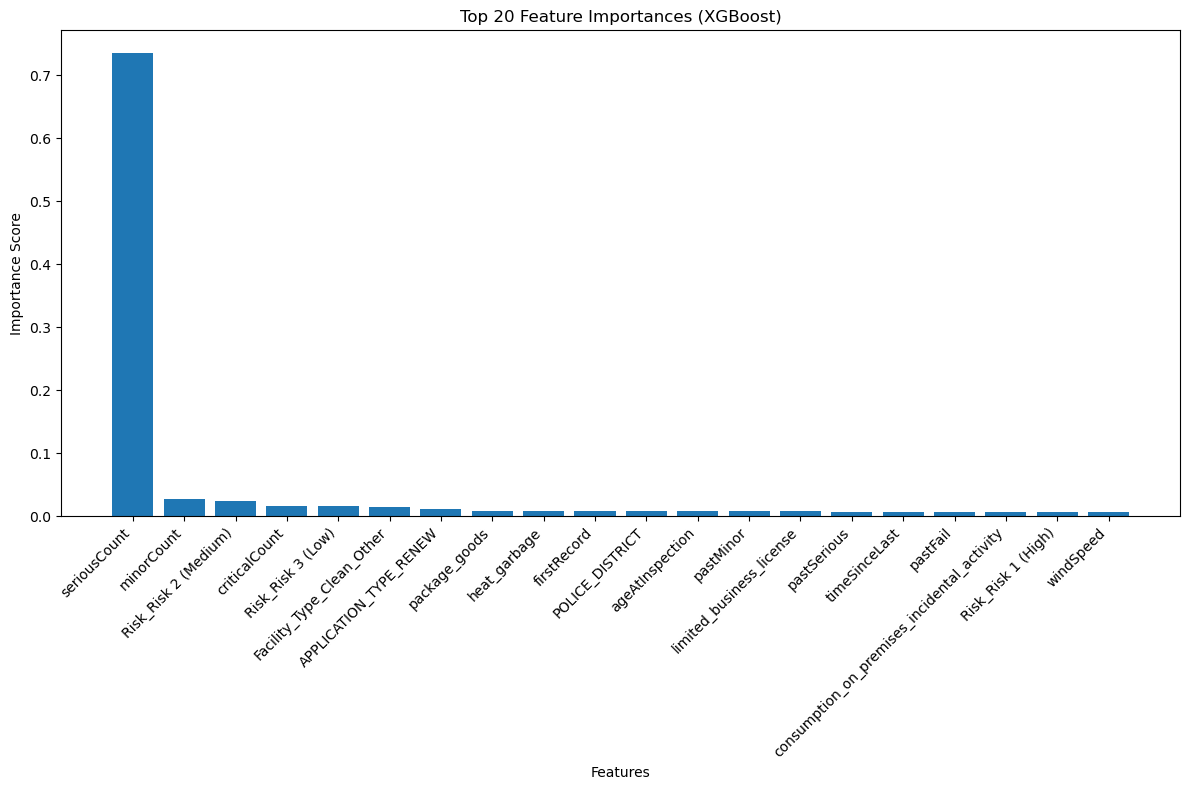

In [47]:

# model = XGBClassifier()
# model.fit(X, y)
feature_importances = best_model_xgb.feature_importances_


features = X.columns.tolist()
# Step 3: Sort the feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Step 4: Plot the top N features
top_n = 20
plt.figure(figsize=(12, 8))
plt.bar(range(top_n), feature_importances[indices[:top_n]], align="center")
plt.xticks(range(top_n), [features[i] for i in indices[:top_n]], rotation=45, ha="right")
plt.title(f"Top {top_n} Feature Importances (XGBoost)")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

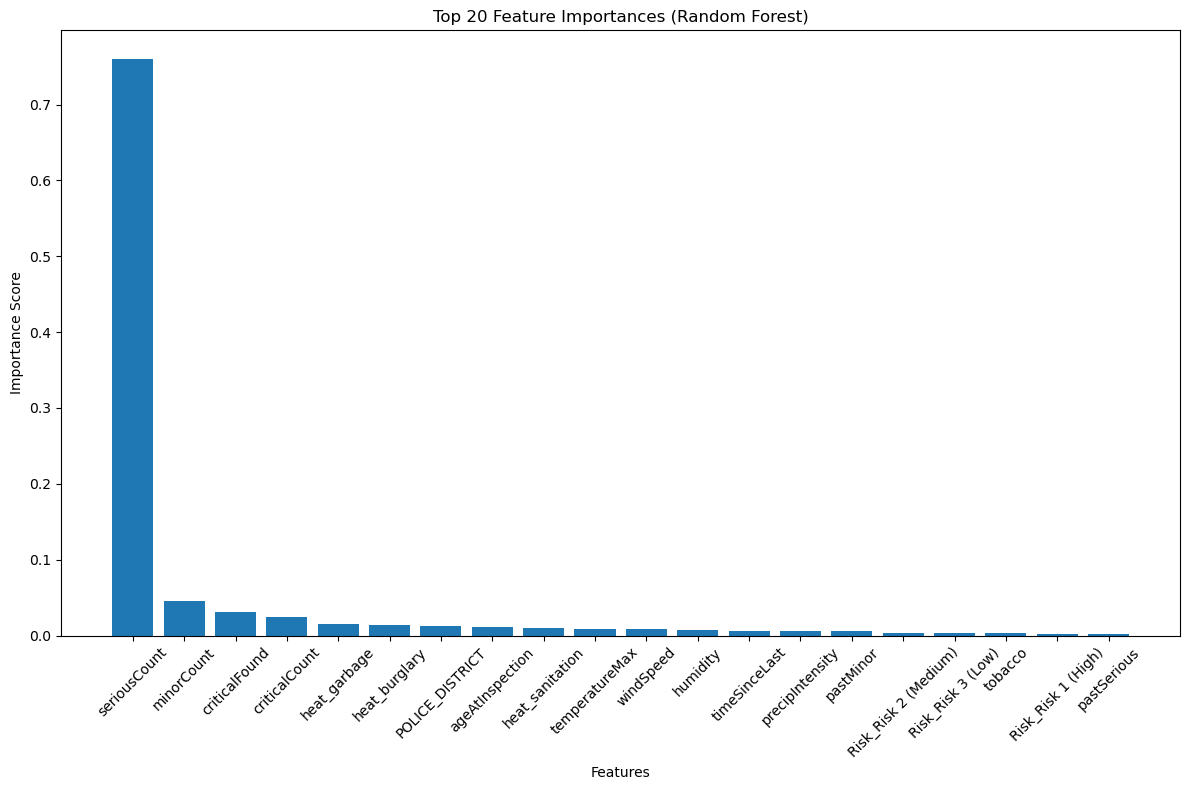

In [48]:
# model = RandomForestClassifier(random_state=42)

feature_importances = best_rf.feature_importances_

features = X.columns.tolist()

indices = np.argsort(feature_importances)[::-1]

# Plotting top N features
top_n = 20
plt.figure(figsize=(12, 8))
plt.bar(range(top_n), feature_importances[indices[:top_n]])
plt.xticks(range(top_n), [features[i] for i in indices[:top_n]], rotation=45)
plt.title(f"Top {top_n} Feature Importances (Random Forest)")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

### Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then:
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [49]:
#
# 1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.
# # Assuming X, y, X_test are prepared
# model = RandomForestClassifier(random_state=42)
# model.fit(X, y)

# Predict risk scores
risk_scores = best_rf.predict_proba(X)[:, 1]  # Probability of being high-risk
outcomes = best_rf.predict(X)

In [50]:
#
# 2. Order your audits by their probability of detecting a "Fail" score
# -----------
risk_scores_sorted = risk_scores[np.argsort(risk_scores)[::-1]]
outcomes_sorted = outcomes[np.argsort(risk_scores)[::-1]]
X_sorted = X.iloc[np.argsort(risk_scores)[::-1]]
y_sorted = y[np.argsort(risk_scores)[::-1]]

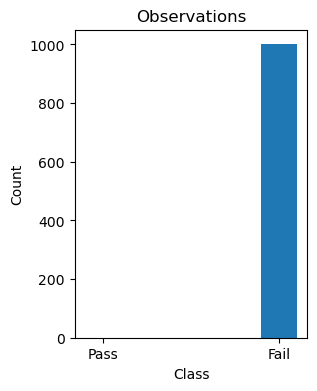

In [51]:
#
# 3. Plot your distribution of pass/fail among the first 1,000 observations in the dataset
# -----------
# Count occurrences of 0 and 1

zeros = np.sum(y_sorted[:1000] == 0)
ones = np.sum(y_sorted[:1000] == 1)

# Create the bar plot
plt.figure(figsize=(3, 4))
plt.bar([0,1], [zeros, ones], tick_label=["Pass", "Fail"], width = 0.2)
plt.title("Observations")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


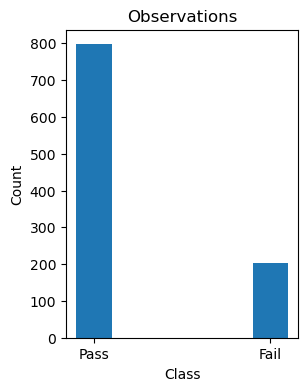

In [53]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# select the random audits

random_df = chicago_inspections_2011_to_2013.sample(n=1000, random_state=42)

y_random = random_df['Results']

# decide if you want to binarize the outcome variable
# -----------
# comment out the following lines of code if you don't want to binarize the target variable
y_random = y_random.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_random = lb_style.fit_transform(y_random)

# recode 0s and 1s so 1s are "Fail"
y_random = np.where(y_random == 1, 0 ,1)

zeros = np.sum(y_random == 0)
ones = np.sum(y_random == 1)

# Create the bar plot
plt.figure(figsize=(3, 4))
plt.bar([0,1], [zeros, ones], tick_label=["Pass", "Fail"], width = 0.2)
plt.title("Observations")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [54]:
# data processing
# -----------

#I already processed the features for testing already when processing the features for training data above.

# process features
# X_test2014 = chicago_inspections_2014[...]
X_test2014 = X_new
# process target
# y_test2014 = chicago_inspections_2014[...]
y_test2014 = y_new


In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

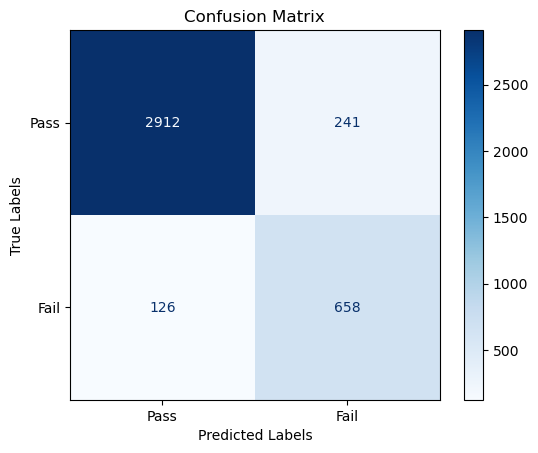

In [56]:
# predict and compare
# -----------
y_pred = best_rf.predict(X_test2014)


# Compute the confusion matrix
cm = confusion_matrix(y_test2014, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Pass", "Fail"])
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix")
disp.ax_.set_xlabel("Predicted Labels")
disp.ax_.set_ylabel("True Labels")
plt.show()


In [57]:
precision = precision_score(y_test2014, y_pred, average='binary')
recall = recall_score(y_test2014, y_pred, average='binary')
f1 = f1_score(y_test2014, y_pred, average='binary')
accuracy = accuracy_score(y_test2014, y_pred)

In [58]:
# evaluate
print(precision)
print(recall)
print(f1)
print(accuracy)

0.731924360400445
0.8392857142857143
0.781937017231135
0.9067818135636271
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=6, min_samples_split=7, n_estimators=50; total time=   0.7s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=6, min_samples_split=7, n_estimators=100; total time=   1.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=6, min_samples_split=7, n_estimators=200; total time=   2.8s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=6, min_samples_split=7, n_estimators=200; total time=   3.0s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END bootstrap=False, max_depth=10, min_samples_leaf=6, min_samples_split=10, n_estimators=200; total time=   2.9s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END bootstrap=False, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50; to

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


Accuracy does not provide a full picture about performance of a model. There can be chances of missing specific cases while predicting a class which is in majority. Other metrics helps in the following ways:

Precision -  Focuses on minimizing false positives by ensuring that the predicted positive cases are relevant.
F1 - score - It combines recall and precision into a single metric when both false positives and false negatives are important.
Recall - Measures a model's ability to identify actual positive cases. It is helpful when we have missed true positives.


2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

There are different ways how this interplay can be avoided. They are:
- By making proxies
- Putting taxes on people who fool the system
- Doing regular audits and monitorings to check for any gaming
- Including human judgements to find out the failed ones
  
